# Lista de Exercícios 6
**Aluno**: Vítor Gabriel Reis Caitité

## Geração dos dados

Os dados gerados a seguir são referentes ao seguinte modelo teórico:

$$Y_i = \beta_0 + \beta_1 e^{\beta_2 x_i} + \epsilon_i$$ 

In [9]:
import sys
sys.path.insert(0, 'C:/Python37/Lib/site-packages')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
from scipy import stats
from scipy.optimize import curve_fit

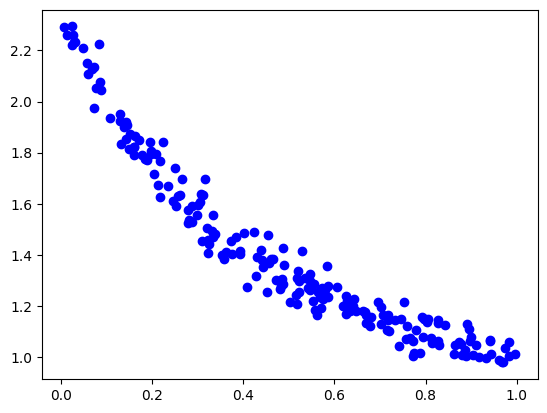

In [10]:
n = 200
x = np.random.uniform(0, 1, n)
y = 0.9 + 1.4 * np.exp(-2.5*x) + np.random.normal(loc=0, scale=0.05, size=n)
plt.scatter(x, y, color="blue")

## Definição do modelo não linear.

In [11]:
def model(x, beta_0, beta_1, beta_2):
    return beta_0 + beta_1 * np.exp(beta_2 * x)
    

## Ajustar o modelo usando mínimos quadrados não linear

In [12]:
initial_params = [1,1,1]
# The following function uses a non-linear least squares to fit a function
optimized_params, cov = curve_fit(model, x, y, p0=initial_params) 
beta_0, beta_1, beta_2 = optimized_params
print(f"Modelo: {beta_0} + {beta_1} * e^({(beta_2)}x)")

Modelo: 0.9161215315891491 + 1.412503198470109 * e^(-2.5956875985792074x)


### Visualização do Modelo

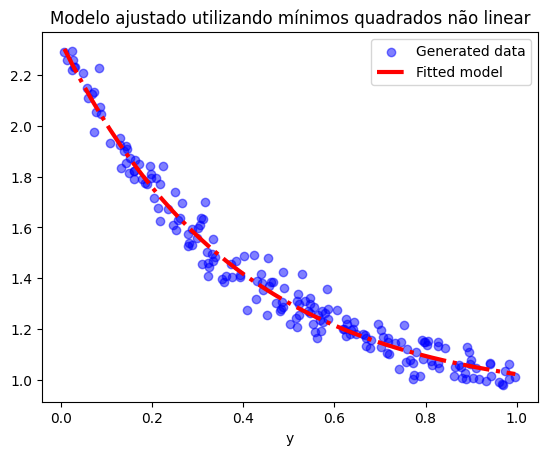

In [13]:
x_sorted = np.sort(x)
y_hat = model(x_sorted, beta_0, beta_1, beta_2)
plt.scatter(x, y, color="blue", label="Generated data", alpha=0.5)
plt.plot(x_sorted, y_hat, label="Fitted model", color="red", linewidth=3.0, linestyle="dashdot")
plt.legend()
plt.xlabel("x")
plt.xlabel("y")
plt.title("Modelo ajustado utilizando mínimos quadrados não linear")
plt.show()


### Avaliação do Modelo

In [14]:
std = np.sqrt(np.diag(cov))
print("Model summary:")
print(f"Beta 0: {beta_0:.4f} +/- {std[0]:.4f}")
print(f"Beta 1: {beta_1:.4f} +/- {std[1]:.4f}")
print(f"Beta 2: {beta_2:.4f} +/- {std[2]:.4f}")
y_hat = model(x, beta_0, beta_1, beta_2)
ss_res = np.sum((y_hat - y)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res/ss_tot)
print(f"R-squared: {r2:.4f}")
n = len(x)
k = len(optimized_params)
f_stat = ((ss_tot - ss_res)/(k-1)) / (ss_res/(n-k))
print(f"F-statistic: {f_stat:.4f}")

Model summary:
Beta 0: 0.9161 +/- 0.0189
Beta 1: 1.4125 +/- 0.0168
Beta 2: -2.5957 +/- 0.0994
R-squared: 0.9761
F-statistic: 4026.6504


## Criação do meu próprio modelo



In [15]:
# Initial conditions:
beta_0 = 1
beta_1 = 1
beta_2 = -1
B = np.array([beta_0, beta_1, beta_2])

# Function evaluated in the initial conditions:
y_hat = beta_0 + beta_1 * np.exp(beta_2 * x)
J = np.zeros((n,k))

for i in range(1000):
    J[:, 0] = np.ones(n)
    J[:, 1] = np.exp(B[2] * x)
    J[:, 2] = B[1] * x * np.exp(B[2] * x)
    Z = (y - y_hat) + J@B
    last_B = B
    B = np.linalg.pinv(J.T @ J) @ J.T @ Z
    y_hat = B[0] + B[1] * np.exp(B[2] * x)
    # Checking convergence
    delta = B - last_B
    if abs(delta[0]) < 0.001 and abs(delta[1]) < 0.001 and abs(delta[2]) < 0.001:
        print(f"Iterations: {i}")
        print(f"beta_0: {B[0]}")
        print(f"beta_1: {B[1]}")
        print(f"beta_2: {B[2]}")
        break

Iterations: 11
beta_0: 0.916121512472505
beta_1: 1.412503204578988
beta_2: -2.5956874907553367


### Visualização do Modelo

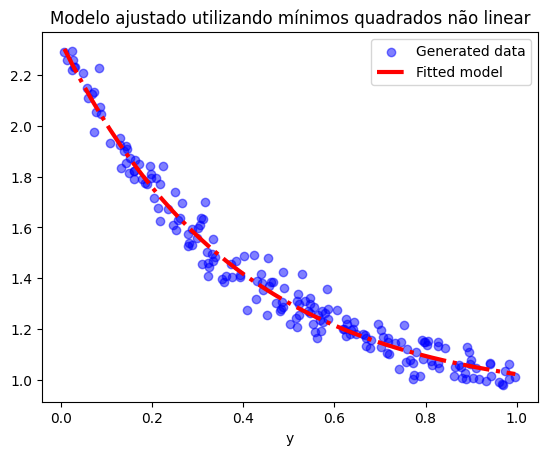

In [16]:
x_sorted = np.sort(x)
y_hat = model(x_sorted, B[0], B[1], B[2])
plt.scatter(x, y, color="blue", label="Generated data", alpha=0.5)
plt.plot(x_sorted, y_hat, label="Fitted model", color="red", linewidth=3.0, linestyle="dashdot")
plt.legend()
plt.xlabel("x")
plt.xlabel("y")
plt.title("Modelo ajustado utilizando mínimos quadrados não linear")
plt.show()

Como é possível perceber, os coeficientes encontrados são bem parecidos com os encontrados utilizando a função curve_fit().